In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
true_b = 1
true_w = 2
n = 100

np.random.seed(42)
x = np.random.rand(n, 1)
epsilon = 0.1 * np.random.randn(n, 1)

y = true_b + true_w * x + epsilon

In [4]:
idx = np.arange(n)
np.random.shuffle(idx)
train_idx = idx[:int(n * 0.8)]
val_idx = idx[int(n * 0.8):]
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

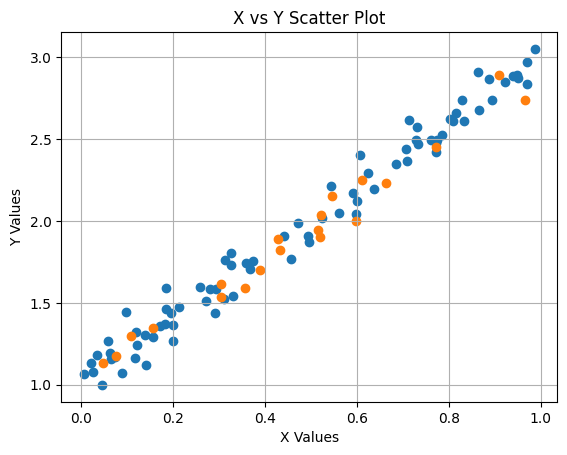

In [5]:
import matplotlib.pyplot as plt

x_train_data, y_train_data = x_train.flatten(), y_train.flatten()
x_val_data, y_val_data = x_val.flatten(), y_val.flatten()
plt.scatter(x_train_data, y_train_data, marker="o")
plt.scatter(x_val_data, y_val_data, marker="o")
plt.title('X vs Y Scatter Plot')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.grid(True)
plt.show()

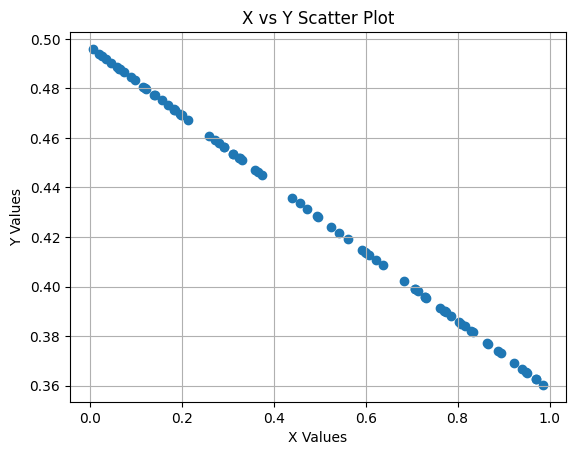

In [6]:
# Now we try to predict it

np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

y_predicted = b + w * x_train

x_data, y_data = x_train.flatten(), y_predicted.flatten()
plt.scatter(x_data, y_data, marker="o")
plt.title("X vs Y Scatter Plot")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.grid(True)
plt.show()

In [7]:
error = y_predicted - y_train
loss = (error**2).mean()
print(loss)
print((error**2).shape)

2.7421577700550976
(80, 1)


In [8]:
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
bs, ws = np.meshgrid(b_range, w_range)

# print(y_train.shape)
# y_predicted0 = bs + ws*x_train[0]
# print(y_predicted0.shape)

all_predictions = np.apply_along_axis(func1d=lambda x: bs + ws * x, axis=1, arr=x_train)
print(all_predictions.shape)

(80, 101, 101)


(80, 1)
(80, 1, 1)
(80, 101, 101)
(101, 101)
-3.044811379650508 -1.8337537171510832
-3.044811379650508 -1.8337537171510832
[0.49671415] [-0.1382643]


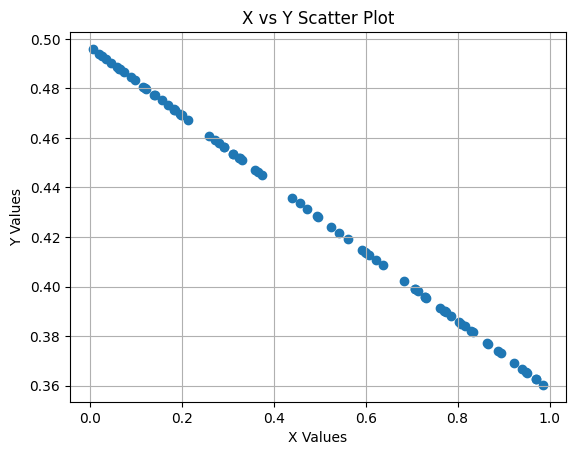

In [9]:
print(y_train.shape)
all_labels = y_train.reshape(-1, 1, 1)
print(all_labels.shape)
print(all_predictions.shape)
all_errors = all_predictions - all_labels
all_errors.shape

all_losses = (all_errors**2).mean(axis=0)
print(all_losses.shape)

y_predicted = b + w * x_train
error = y_predicted - y_train

b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

lr = 0.01
print(b_grad, w_grad)
print(b, w)
b = b - lr * b_grad
w = w - lr * w_grad


x_data, y_data = x_train.flatten(), y_predicted.flatten()
plt.scatter(x_data, y_data, marker="o")
plt.title("X vs Y Scatter Plot")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.grid(True)
plt.show()

In [10]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_val = scaler.transform(x_val)

print(scaled_x_val)
print(scaled_x_train)

[[-0.54811074]
 [-1.0334378 ]
 [ 0.62066576]
 [-1.19052198]
 [ 1.42660312]
 [-0.54932399]
 [ 0.24247317]
 [ 0.97480052]
 [ 1.61049288]
 [ 0.41211384]
 [-0.13230121]
 [ 0.15547092]
 [-0.27359515]
 [-1.29939875]
 [-0.37784519]
 [ 0.13642093]
 [ 0.16417305]
 [-1.39116211]
 [ 0.45520116]
 [-0.14668279]]
[[ 9.75790537e-01]
 [-1.33529489e+00]
 [ 1.27567819e+00]
 [-1.45984132e+00]
 [ 8.47530556e-01]
 [-1.30105110e+00]
 [-8.93928711e-01]
 [-5.27313765e-01]
 [-7.96873734e-04]
 [ 1.62340037e+00]
 [-1.14432454e+00]
 [ 9.88403738e-01]
 [ 1.07678373e+00]
 [ 8.39733140e-01]
 [-1.22389389e+00]
 [-9.39193561e-01]
 [-1.03335903e+00]
 [-1.47562917e+00]
 [ 1.67990232e+00]
 [ 4.92576401e-01]
 [ 7.69413588e-01]
 [ 4.09636886e-01]
 [ 1.46759858e+00]
 [ 5.39141337e-01]
 [-6.25437098e-01]
 [-6.97784335e-01]
 [-1.15230556e+00]
 [ 8.37777028e-01]
 [ 1.55580597e+00]
 [ 4.41132927e-01]
 [ 2.90042508e-01]
 [ 6.96763907e-02]
 [-9.49086578e-01]
 [-6.56739179e-01]
 [ 1.62446241e+00]
 [-8.49440404e-01]
 [-9.43928465e-

In [ ]:
import torch
torch.cuda.is_available()